# WeatherPy

Pranav Jayanth - 10/5/2019

## 4 Observations

1) Larger positive latitudes tend to be colder in general.

2) Humidity tends to be higher when closer to 0 latitude, which makes sense that means those cities are probably closer to the equator

3) Cloudiness doesn't seem to have much of a correaltion with latitude

4) Latitude and windspeed seem to be clustered to less then 8 mph for the data that we collected here. There do seem to be outliers, perhaps other considerations need to be taken here like altitude? 

In [240]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [148]:
# List for holding lat_lngs and cities
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

In [149]:
# Identify nearest city for each lat, lng combination
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [150]:
## Defining a function that will handle the API calls

def get_data(name):
    search_url = 'https://api.openweathermap.org/data/2.5/weather?q='
    search_city = name
    api_string = '&APPID='+api_key
    full_url = search_url + search_city + api_string
    response = requests.get(full_url)
    return response.json()

In [151]:
## Defining a function that will handle the specific attributes we want to extract 
## from the API calls

def get_attributes(json):
    r_json = json
    city = r_json['name']
    cloud = r_json['clouds']['all']
    country = r_json['sys']['country']
    date = r_json['dt']
    humidity = r_json['main']['humidity']
    lat = r_json['coord']['lat']
    lon = r_json['coord']['lon']
    temp = r_json['main']['temp']
    wind = r_json['wind']['speed']
    weather_dict = {
        'City': city,
        'Country': country,
        'Cloudiness': cloud,
        'Date': date,
        'Humidity': humidity,
        'Latitude': lat,
        'Longitude': lon,
        'Max Temp': temp,
        'Wind Speed': wind
    }
    return weather_dict

In [153]:
## Defining an empty list array that will comprise our list of dicts that will form the basis of 
## a pandas dataframe. 

pre_dataframe_dict = []

## Initialize loop that will call the get_attributes and get_data function in order
## to append the results back to our list we defined above.

for i in cities:
    try:
        results = get_attributes(get_data(i))
        print('Getting data for: ' + results['City'])
        pre_dataframe_dict.append(results)
    except:
        print('City not found')

Getting data for: Thompson
Getting data for: Independencia
Getting data for: Egvekinot
Getting data for: Port Elizabeth
Getting data for: Busselton
Getting data for: Grand Gaube
Getting data for: Tezu
Getting data for: Khatanga
Getting data for: Sao Filipe
Getting data for: Rikitea
Getting data for: Castro
Getting data for: Atuona
Getting data for: Codrington
Getting data for: Dikson
Getting data for: Aklavik
Getting data for: Ushuaia
Getting data for: Voyvozh
Getting data for: Punta Arenas
Getting data for: Santa Isabel do Rio Negro
Getting data for: Kapaa
Getting data for: Hermanus
Getting data for: Hobart
Getting data for: Baruun-Urt
Getting data for: Fukue
City not found
Getting data for: Fonte Boa
Getting data for: Hoopstad
City not found
Getting data for: Ketchikan
Getting data for: Mgandu
Getting data for: Vaini
Getting data for: College
Getting data for: Saint-Philippe
Getting data for: Mount Gambier
Getting data for: Albany
Getting data for: Bluff
Getting data for: Cayenne
Get

Getting data for: Rawson
Getting data for: Kalmunai
Getting data for: Danjiangkou
Getting data for: Ismailia
City not found
Getting data for: Batemans Bay
Getting data for: Mitsamiouli
Getting data for: Esperance
Getting data for: Tuktoyaktuk
Getting data for: Komsomolskiy
City not found
Getting data for: Vanimo
Getting data for: Haines Junction
Getting data for: Souillac
Getting data for: Laguna
Getting data for: Kingsville
Getting data for: Adet
Getting data for: Chuy
Getting data for: Rongcheng
Getting data for: Broome
Getting data for: Chumphon
Getting data for: Luwingu
Getting data for: Alekseyevskaya
Getting data for: Kerman
Getting data for: Calafell
Getting data for: Sanchor
Getting data for: Bilibino
City not found
Getting data for: Amazar
Getting data for: Civitavecchia
City not found
Getting data for: Berdigestyakh
Getting data for: Coos Bay
Getting data for: Mehamn
Getting data for: Cuamba
Getting data for: Pavilosta
Getting data for: Tessalit
Getting data for: Ostrovnoy
Ge

In [213]:
## Create the Dataframe.
## Save it in a CSV as well so we don't have to loop through ~600 API calls again

weather_df = pd.DataFrame(pre_dataframe_dict)
weather_df.to_csv('weather_api_results.csv',index=False)

In [263]:
## Re-init dataframe to read from the CSV for analysis

weather_df = pd.read_csv('weather_api_results.csv')
weather_df.count()

City          541
Cloudiness    541
Country       540
Date          541
Humidity      541
Latitude      541
Longitude     541
Max Temp      541
Wind Speed    541
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [219]:
## Dsiplay dataframe we created above to see what's up

weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Thompson,90,CA,1570303001,81,55.74,-97.86,281.150,2.06
1,Independencia,15,MX,1570303001,60,20.06,-97.05,298.902,2.75
2,Egvekinot,100,RU,1570303001,81,66.32,-179.17,266.662,5.16
3,Port Elizabeth,1,US,1570303002,39,39.31,-74.98,289.630,3.60
4,Busselton,65,AU,1570303002,69,-33.64,115.35,280.530,4.88


In [220]:
## Convert Max Temp from K to F so it's easier to understand when we plot that info 

for i,v in weather_df.iterrows():
    f = ((weather_df['Max Temp']-273.15)*9/5+32)
    weather_df['Max Temp in F'] = round(f,2)

In [229]:
weather_df['Max Temp in F'].head()

0    46.40
1    78.35
2    20.32
3    61.66
4    45.28
Name: Max Temp in F, dtype: float64

### Plotting the Data

* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

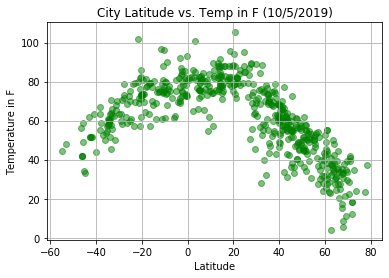

In [235]:
## Create scatterplot for Latitude vs. Temp in F

plt.scatter(weather_df['Latitude'],weather_df['Max Temp in F'],color='g',alpha=0.5)
plt.title('City Latitude vs. Temp in F (10/5/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature in F')
plt.grid()
plt.savefig('latitude_vs_temp.png')

#### Latitude vs. Humidity Plot

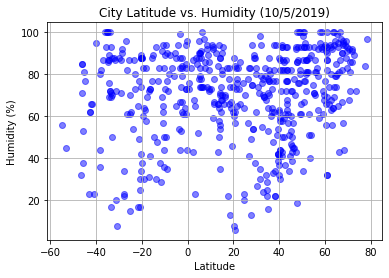

In [236]:
## Create scatterplot for latitude vs. humidity

plt.scatter(weather_df['Latitude'],weather_df['Humidity'],color='b',alpha=0.5)
plt.title('City Latitude vs. Humidity (10/5/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('latitude_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

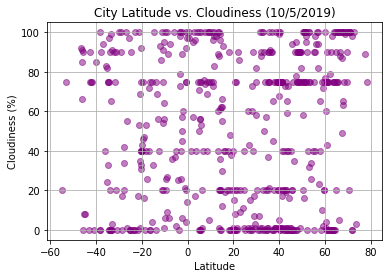

In [237]:
## Plot latitude vs. cloudiness

plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],color='purple',alpha=0.5)
plt.title('City Latitude vs. Cloudiness (10/5/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('latitude_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

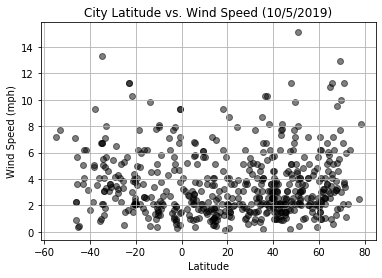

In [238]:
## Plot latitude vs. Wind Speed

plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'],color='black',alpha=0.5)
plt.title('City Latitude vs. Wind Speed (10/5/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('latitude_vs_windspeed.png')